In [1]:
# From: https://introcs.cs.princeton.edu/python/23recursion/graycode.py.html

# Return an n-bit Gray code.

def genCode(n):
    if n == 0:
        return ['']
    
    code1 = genCode(n-1)
    code2 = []
    for codeWord in code1:
        code2 = [codeWord] + code2
        
    for i in range(len(code1)):
        code1[i] += '0'
    for i in range(len(code2)):
        code2[i] += '1'
    return code1 + code2    

In [2]:
n = 4
code = genCode(n)
for codeWord in code:
    print(codeWord)

0000
1000
1100
0100
0110
1110
1010
0010
0011
1011
1111
0111
0101
1101
1001
0001


In [3]:
import networkx as nx

# Create a graph
G = nx.wheel_graph(6)

# Relabel nodes so that they are numbered 1, 2, ..., 10.
# This way, they will be numbered the same as PORTA.
mapping = { i: i+1 for i in G.nodes }
G = nx.relabel_nodes(G, mapping)

print("Vertices:",G.nodes)
print("Edges:",G.edges)

Vertices: [1, 2, 3, 4, 5, 6]
Edges: [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 6), (3, 4), (4, 5), (5, 6)]


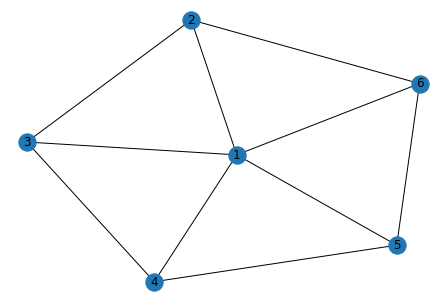

In [4]:
# Visualize the graph, for fun
import matplotlib.pyplot as plt
nx.draw( G, with_labels=True )

In [5]:
def is_stable(G, mycodeword):
    for i,j in G.edges:
        if mycodeword[i-1]=='1' and mycodeword[j-1]=='1':    
            return False
    return True

In [6]:
print(is_stable(G,"000000"))
print(is_stable(G,"100000"))
print(is_stable(G,"010100"))
print(is_stable(G,"011100"))
print(is_stable(G,"111111"))

True
True
True
False
False


In [7]:
# open file 
filename = "stable-sets-of-6-wheel.poi"
file = open(filename, "w")

n = G.number_of_nodes()

In [8]:
# print .poi header to file

file.write("DIM = "+str(n)+"\n")
file.write("\n")
file.write("CONV_SECTION\n")

13

In [9]:
# print .poi feasible points to file
code = genCode(G.number_of_nodes())
for codeWord in code:
    if is_stable(G, codeWord):
        # print codeWord, but with spaces between every character
        file.write(" ".join(codeWord)+"\n")   

In [10]:
# print .poi footer to file and close it
file.write("END\n")
file.write("\n")
file.write("DIMENSION OF THE POLYHEDRON : "+str(n) + "\n" )

file.close()